# Milestone 1 - Visualization - King County House Data
### Author - Tyler Crosse

## Problem Statement:

A developer interest in acquiring properties in King County Washington is interested in what home features (zip code, structure, and so on) would yield a high price.

### Instructions

1. Generate a clear statement problem and provide location for dataset
2. Provide a clear solution to the problem for a non-technical audience
3. Visually explore the data to generate insight and include summary statistics

## Setup

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the data
url = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv"
house_df = pd.read_csv(url)

## Initial Exploration

In [2]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [4]:
# convet to date to datetime
house_df['date'] = pd.to_datetime(house_df['date'])

In [5]:
# look for any null values
house_df.isnull().values.any()

False

In [18]:
# investigate outliers in bedrooms - this was noticed in the pairplots and then moved here to improve results
house_df.loc[house_df['bedrooms'] > 12, 'bedrooms']

15870    33
Name: bedrooms, dtype: int64

In [19]:
# remove outlier
house_df.drop(house_df[house_df['bedrooms'] > 12].index, inplace=True)

In [38]:
house_df.loc[house_df['price'] > 4000000, 'price']

1164     5110800.0
1315     5300000.0
1448     5350000.0
2626     4500000.0
3914     7062500.0
4411     5570000.0
7252     7700000.0
8092     4668000.0
8638     4489000.0
9254     6885000.0
12370    4208000.0
Name: price, dtype: float64

In [6]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Heatmap & Correlations

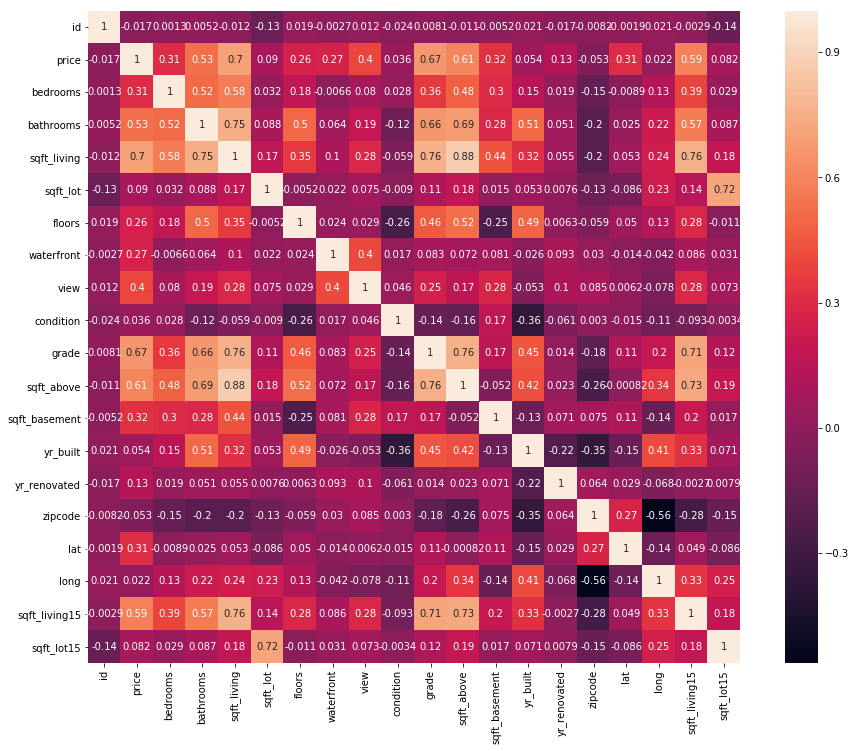

In [7]:
corrmat = house_df.corr()
ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, square=True, annot=True)

In [8]:
corrmat[['price']].sort_values(by=['price'], ascending=False)

,price
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525138
view,0.397293
sqft_basement,0.323816
bedrooms,0.308350
lat,0.307003


In [10]:
# Sort correlation matrix - technique from https://stackoverflow.com/a/17778786
corr_unstack = corrmat.unstack()
corr_sorted = corr_unstack.sort_values(kind='quicksort')
corr_sorted.head(20)

zipcode        long            -0.564072
long           zipcode         -0.564072
yr_built       condition       -0.361417
condition      yr_built        -0.361417
zipcode        yr_built        -0.346869
yr_built       zipcode         -0.346869
zipcode        sqft_living15   -0.279033
sqft_living15  zipcode         -0.279033
condition      floors          -0.263768
floors         condition       -0.263768
sqft_above     zipcode         -0.261190
zipcode        sqft_above      -0.261190
sqft_basement  floors          -0.245705
floors         sqft_basement   -0.245705
yr_built       yr_renovated    -0.224874
yr_renovated   yr_built        -0.224874
bathrooms      zipcode         -0.203866
zipcode        bathrooms       -0.203866
sqft_living    zipcode         -0.199430
zipcode        sqft_living     -0.199430
dtype: float64

In [11]:
corr_sorted.tail(60)

yr_built       bathrooms        0.506019
bathrooms      yr_built         0.506019
               bedrooms         0.515884
bedrooms       bathrooms        0.515884
sqft_above     floors           0.523885
floors         sqft_above       0.523885
bathrooms      price            0.525138
price          bathrooms        0.525138
sqft_living15  bathrooms        0.568634
bathrooms      sqft_living15    0.568634
sqft_living    bedrooms         0.576671
bedrooms       sqft_living      0.576671
price          sqft_living15    0.585379
sqft_living15  price            0.585379
price          sqft_above       0.605567
sqft_above     price            0.605567
bathrooms      grade            0.664983
grade          bathrooms        0.664983
               price            0.667434
price          grade            0.667434
bathrooms      sqft_above       0.685342
sqft_above     bathrooms        0.685342
sqft_living    price            0.702035
price          sqft_living      0.702035
grade          s

### Heatmap & Correlation observations
- The columns with the highest correlation with price are in order are: sqft_living, grade, sqft_above, sqft_living15, bathrooms, view, sqft_basement, and bedrooms
- The house size columns are closely correlated with each other. Particuarly, sqft_living with sqft_above, sqft_living with sqft_living15
- The Sqft_living is closely correlated with both grade and number of bathrooms.
- Year built is negatively correlated with condition.
- There is a slight negative correlation between zipcode both sqft_living and year built.

## Pairplots

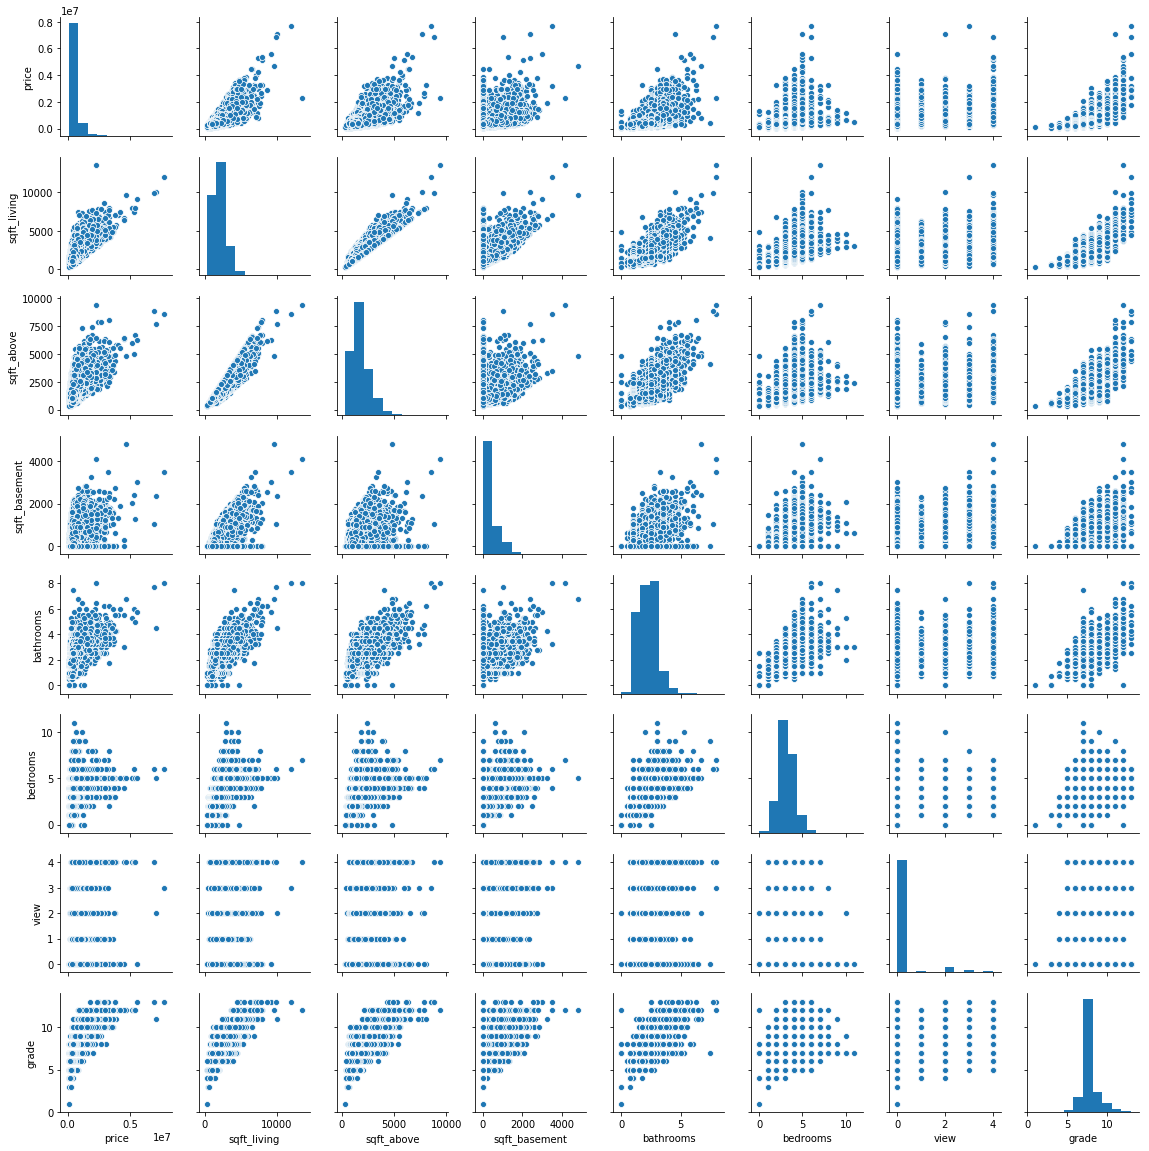

In [27]:
pair_cols = ['price', 'sqft_living', 'sqft_above', 'sqft_basement', 'bathrooms', 'bedrooms', 'view', 'grade']
sns.pairplot(house_df.loc[:, pair_cols], height=2)

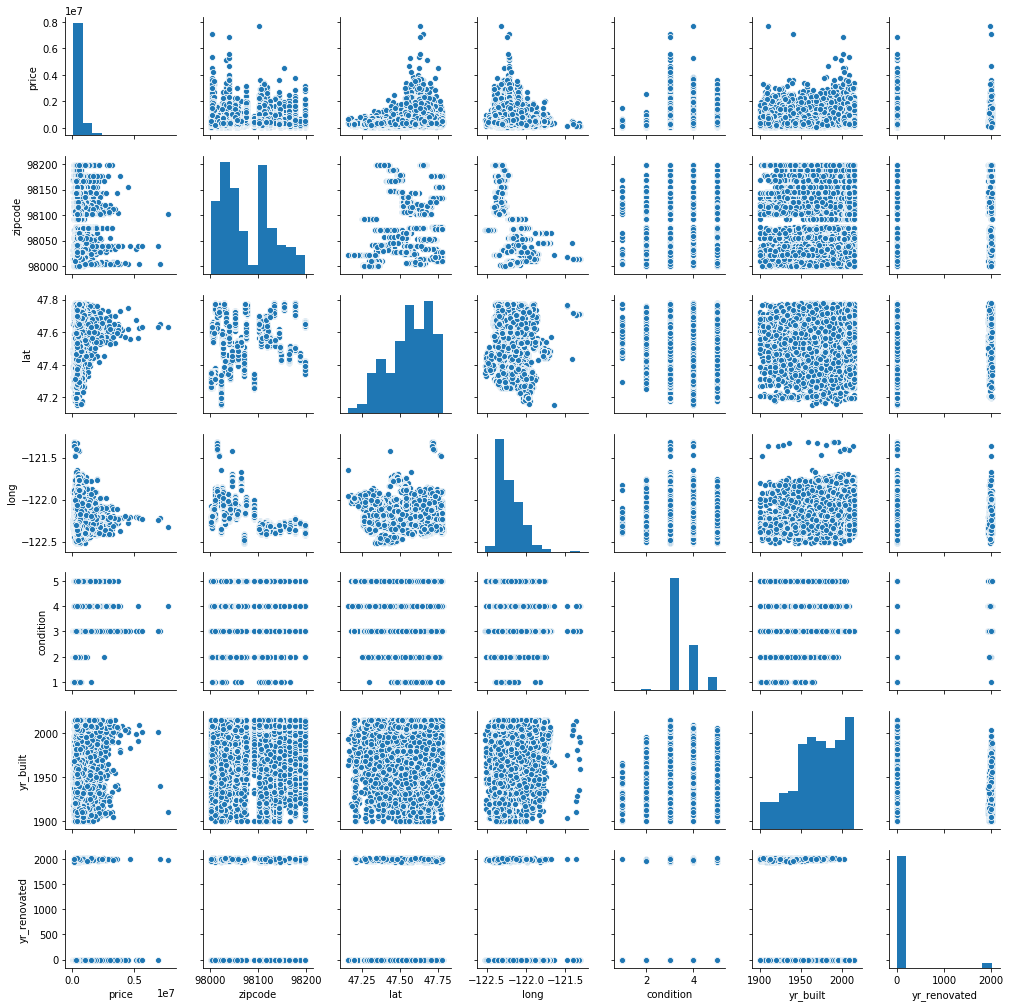

In [28]:
pair_cols = ['price', 'zipcode', 'lat', 'long', 'condition', 'yr_built', 'yr_renovated']
sns.pairplot(house_df.loc[:, pair_cols], height=2)

### Pairplot oberservations
- There appear to be a couple outliers skewing the ranges of the plots. In particular, bedrooms is the worst but price and sqft_living also seem to have some as well. The outlier in bedroom was removed (see comment above) and the plots were recomputed.
- Square feet, bedrooms, bathrooms, and grade show nice looking plots. 

## Boxplots

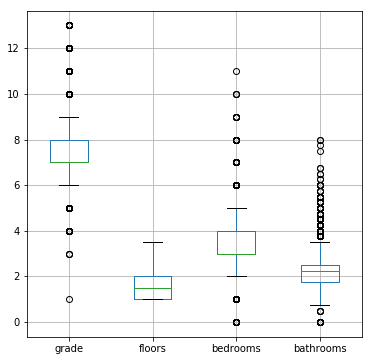

In [22]:
fig = plt.figure(figsize=(6, 6)) # Define plot area
ax = fig.gca() # Define axis 
house_df.loc[:,['grade', 'floors', 'bedrooms', 'bathrooms']].boxplot(ax = ax)

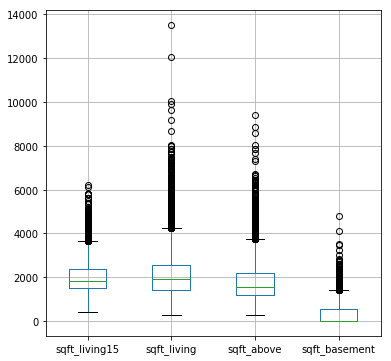

In [24]:
fig = plt.figure(figsize=(6, 6)) # Define plot area
ax = fig.gca() # Define axis 
house_df.loc[:,['sqft_living15', 'sqft_living', 'sqft_above', 'sqft_basement']].boxplot(ax = ax)

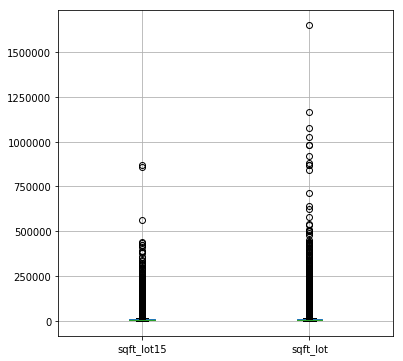

In [25]:
fig = plt.figure(figsize=(6, 6)) # Define plot area
ax = fig.gca() # Define axis 
house_df.loc[:,['sqft_lot15', 'sqft_lot']].boxplot(ax = ax)

### Boxplot Observations
- The square foot columns have means in the middle of their quartiles, with whiskers that are also roughly the same length.
- For the square foot columns there are a large number of outliers above the top whisker.
- The mean of bedrooms, bathrooms, and floors seems to fall in the range of of 1.5 - 3

## PDF/Histograms

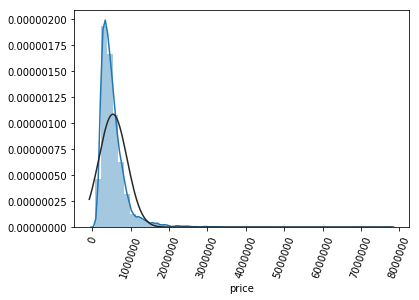

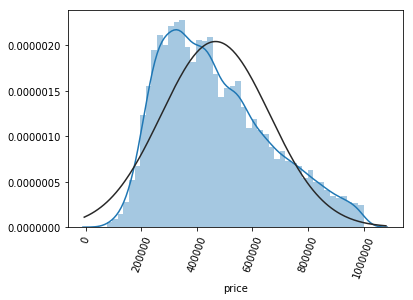

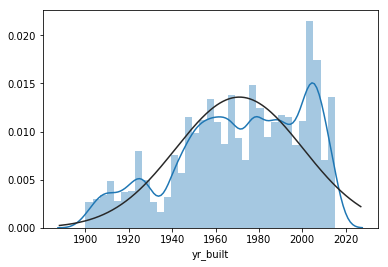

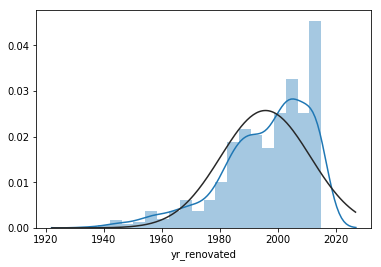

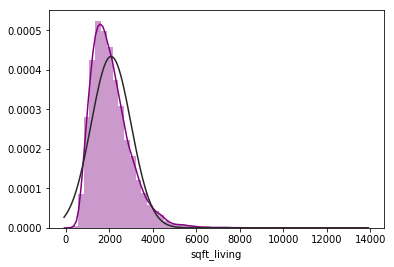

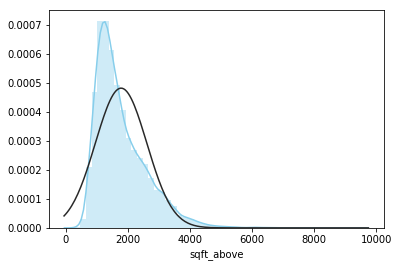

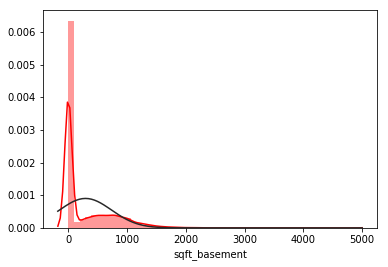

In [79]:
# all house prices
sns.distplot(house_df.loc[:, 'price'], fit=stats.norm);
plt.xticks(rotation=70)
plt.show();

# house prices < 1 million
sns.distplot(house_df.loc[house_df['price'] < 1000000, 'price'], fit=stats.norm);
plt.xticks(rotation=70)
plt.show();


# year built
sns.distplot(house_df.loc[:, 'yr_built'], fit=stats.norm);
plt.show();

# year renovated
sns.distplot(house_df.loc[house_df['yr_renovated'] > 1, 'yr_renovated'], fit=stats.norm);
plt.show();

# livable space
sns.distplot(house_df.loc[:, 'sqft_living'], color='purple', label='Sqft Living', fit=stats.norm);
plt.show();
sns.distplot(house_df.loc[:, 'sqft_above'], color='skyblue', label='Sqft Above', fit=stats.norm);
plt.show();
sns.distplot(house_df.loc[:, 'sqft_basement'], color='red', label='Sqft Basement', fit=stats.norm);
plt.show();


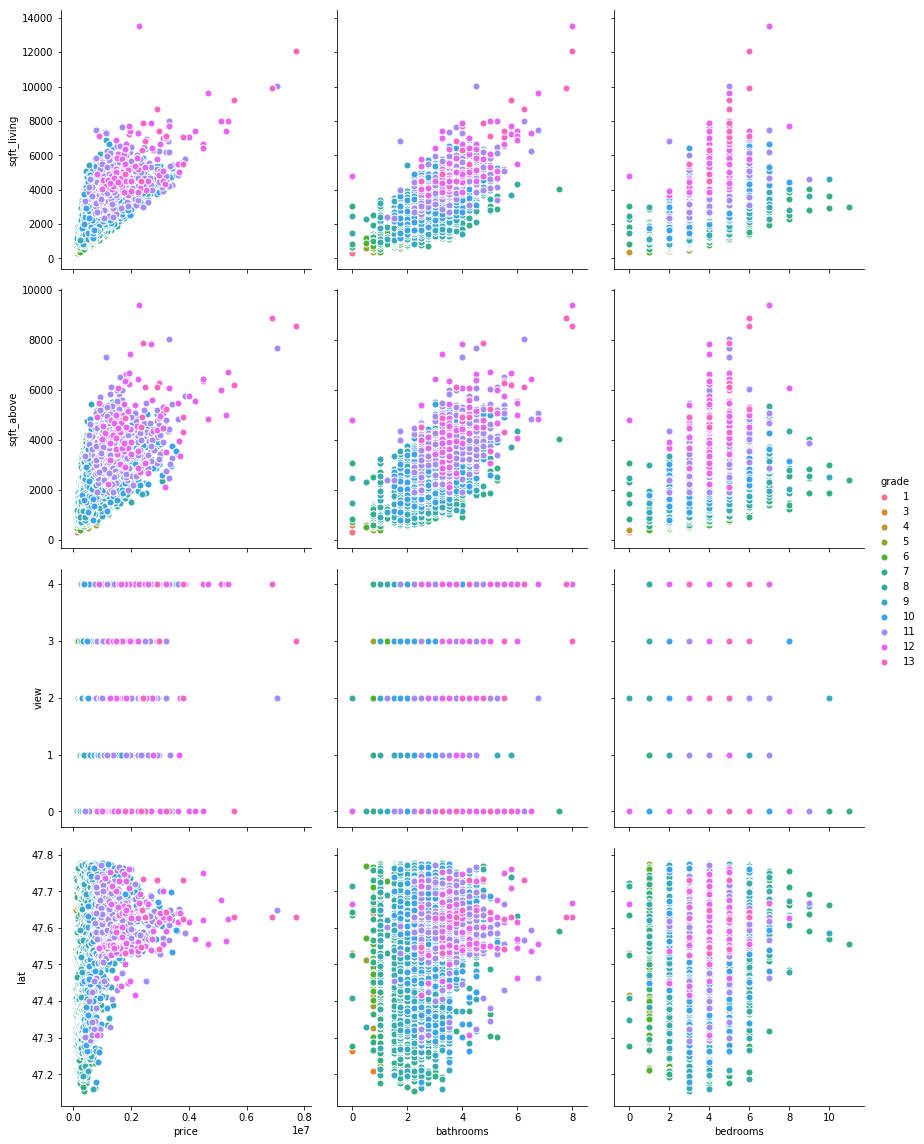

In [71]:
g = sns.PairGrid(house_df, x_vars=["price", "bathrooms", "bedrooms"], y_vars=["sqft_living", "sqft_above", "view", "lat"], height=4, hue="grade")
g.map(plt.scatter, s=50, edgecolor="white")
g.add_legend();

## Conclusions
Problem: A developer interest in acquiring properties in King County Washington is interested in what home features (zip code, structure, and so on) would yield a high price.

Solution: The features that contribute most to high price are the livable square feet with a correlation of 0.702, the grade with a correlation of 0.667, a large number of bahtrooms with a 0.525, and a view 0.397.